### Внимание! Важно помнить, что к названию таблиц вам необходимо добавлять постфикс в виде первой буквы своего имени!

Т.е. table_1, из первого задания, вы называете как table_1_m, table_1_d и т..

## Задача 1
1. Создать две таблицы и назвать их "table_1" и "table_2"
2. Провести LEFT JOIN по ключу name
3. Провести RIGHT JOIN по ключу name
4. Провести INNER JOIN по ключу name
5. Провести OUTER JOIN по ключу name

В каждом случае вывести результат на печать

Первая таблица содержит два столбца (name и surname), в которых содержатся следующие строки:

Вторая таблица содержит два столбца (name и age), в которых содержатся следующие строки:

In [1]:
import pymysql

In [2]:
db_conn = pymysql.connect(host="139.162.170.240", user="nordic",
                          passwd="password0", db="nordicDB")
cursor = db_conn.cursor()

In [3]:
query = """
    CREATE TABLE IF NOT EXISTS table_1_k (
        `name` TEXT NOT NULL,
        `surname` TEXT NOT NULL
    )
"""

cursor.execute(query)
db_conn.commit()

In [4]:
query = """
            INSERT INTO table_1_k (
                name, surname
                ) 
            VALUES ('Петров', 'Иван'),
            ('Иванов', 'Иван'),
            ('Дмитриев', 'Юрий'),
            ('Иванов', 'Петр')
"""

cursor.execute(query)
db_conn.commit()

In [5]:
query = """
    CREATE TABLE IF NOT EXISTS table_2_k (
        `name` TEXT NOT NULL,
        `age` INT NOT NULL
    )
"""

cursor.execute(query)
db_conn.commit()

In [6]:
query = """
            INSERT INTO table_2_k (
                name, age
                ) 
            VALUES ('Иван', 19),
            ('Илья', 5),
            ('Юрий', 20)
"""

cursor.execute(query)
db_conn.commit()

In [8]:
query = """
    SELECT *
    FROM table_1_k as table_1
    INNER JOIN
        table_2_k as table_2
    on table_1.surname = table_2.name
"""
cursor.execute(query)
cursor.fetchall()

(('Петров', 'Иван', 'Иван', 19),
 ('Иванов', 'Иван', 'Иван', 19),
 ('Дмитриев', 'Юрий', 'Юрий', 20))

In [9]:
query = """
    SELECT *
    FROM table_1_k as table_1
    LEFT JOIN
        table_2_k as table_2
    on table_1.surname = table_2.name
"""
cursor.execute(query)
cursor.fetchall()

(('Петров', 'Иван', 'Иван', 19),
 ('Иванов', 'Иван', 'Иван', 19),
 ('Дмитриев', 'Юрий', 'Юрий', 20),
 ('Иванов', 'Петр', None, None))

In [10]:
query = """
    SELECT *
    FROM table_1_k as table_1
    RIGHT JOIN
        table_2_k as table_2
    on table_1.surname = table_2.name
"""
cursor.execute(query)
cursor.fetchall()

(('Петров', 'Иван', 'Иван', 19),
 ('Иванов', 'Иван', 'Иван', 19),
 ('Дмитриев', 'Юрий', 'Юрий', 20),
 (None, None, 'Илья', 5))

In [14]:
query = """
    SELECT *
    FROM table_1_k as table_1
    RIGHT JOIN
        table_2_k as table_2
    on table_1.surname = table_2.name
    UNION
     SELECT *
    FROM table_1_k as table_1
    LEFT JOIN
        table_2_k as table_2
    on table_1.surname = table_2.name
"""
cursor.execute(query)
cursor.fetchall()

(('Петров', 'Иван', 'Иван', 19),
 ('Иванов', 'Иван', 'Иван', 19),
 ('Дмитриев', 'Юрий', 'Юрий', 20),
 (None, None, 'Илья', 5),
 ('Иванов', 'Петр', None, None))

## Задача 2

Работаем с файлом `telecom-churn.csv`

1. Необходимо записать его данные в таблицу с помощью CREATE TABLE

Что считаем:

In [16]:
import csv
import pandas as pd

In [116]:
df = pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [37]:
query = """
    CREATE TABLE IF NOT EXISTS telecom_churn_Balaev_K (
        ID INT PRIMARY KEY AUTO_INCREMENT,
        `State` TEXT,
        `Account length` INT,
        `Area code` INT,
        `International plan` TEXT,
        `Voice mail plan` TEXT,
        `Number vmail messages` INT,
        `Total day minutes` FLOAT,
        `Total day calls` INT,
        `Total day charge` FLOAT,
        `Total eve minutes` FLOAT,
        `Total eve calls` INT,
        `Total eve charge` FLOAT,
        `Total night minutes` FLOAT,
        `Total night calls` INT,
        `Total night charge` FLOAT,
        `Total intl minutes` FLOAT,
        `Total intl calls` INT,
        `Total intl charge` FLOAT,
        `Customer service calls` INT,
        `Churn` TEXT
    )
"""

cursor.execute(query)
db_conn.commit()

In [36]:
query = """
    DROP TABLE  telecom_churn_Balaev_K
"""

cursor.execute(query)
db_conn.commit()

In [40]:
query = """
    INSERT INTO telecom_churn_Balaev_K (
        `State`,
        `Account length`,
        `Area code`,
        `International plan`,
        `Voice mail plan`,
        `Number vmail messages`,
        `Total day minutes`,
        `Total day calls`,
        `Total day charge`,
        `Total eve minutes`,
        `Total eve calls`,
        `Total eve charge`,
        `Total night minutes`,
        `Total night calls`,
        `Total night charge`,
        `Total intl minutes`,
        `Total intl calls`,
        `Total intl charge`,
        `Customer service calls`,
        `Churn`
    )
    VALUES (%s, %s, %s, %s, %s,%s, %s, %s, %s, %s,%s, %s, %s, %s, %s,%s, %s, %s, %s, %s)
"""

In [41]:
from tqdm.auto import tqdm
for row in tqdm(df.values):
    cursor.execute(query, row.tolist())

### Выведите кол-во уникальных значений попя `Customer service calls` (Через SQL)

In [58]:
query = """
    SELECT Count(DISTINCT `Customer service calls`) 
    FROM telecom_churn_Balaev_K
"""

cursor.execute(query)
cursor.fetchall()

((10,),)

### Выведите, сколько пользователей звонили какое число раз в колл-центр (Через SQL). Т.е. необходимо определить, сколько звонило 0, сколько 1, сколько 2 и т.д. (Через SQL)

#### Отдельно нарисуйте гистограмму (распределение) числа звонков в колл-центр по результатам расчета (Это делаем уже в PYTHON! Предварительно нужно сохранить результат прошлого расчета)

In [145]:
query = """
    SELECT DISTINCT `Customer service calls`, Count(`Customer service calls`) 
    FROM telecom_churn_Balaev_K
    GROUP BY `Customer service calls`
"""

cursor.execute(query)
cursor.fetchall()

((1, 1181),
 (0, 697),
 (2, 759),
 (3, 429),
 (4, 166),
 (5, 66),
 (7, 9),
 (9, 2),
 (6, 22),
 (8, 2))

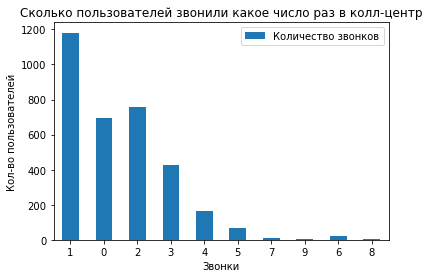

In [128]:
calls = []
count_calls = []
for i , j in data:
    calls.append(i)
    count_calls.append(j)
data_ = {'Звонки': calls,
        'Количество звонков': count_calls}
df_2 = pd.DataFrame(data_)
df_2 = df_2.set_index('Звонки')
df_2.plot(kind='bar',rot=0, title = 'Сколько пользователей звонили какое число раз в колл-центр')
plt.ylabel('Кол-во пользователей');

### Вывести тех лояльных пользователей, которые не сталкиваются с роумингом и необходимостью часто звонить в колл-центр (Через SQL)

In [98]:
query = """
    SELECT *
    FROM telecom_churn_Balaev_K
    WHERE
        `Customer service calls` < 3
    AND
        `International plan` = 'No'
    AND
        `Churn` = 0
"""

cursor.execute(query)
data_2 = cursor.fetchall()
data_2

((1,
  'KS',
  128,
  415,
  'No',
  'Yes',
  25,
  265.1,
  110,
  45.07,
  197.4,
  99,
  16.78,
  244.7,
  91,
  11.01,
  10.0,
  3,
  2.7,
  1,
  '0'),
 (2,
  'OH',
  107,
  415,
  'No',
  'Yes',
  26,
  161.6,
  123,
  27.47,
  195.5,
  103,
  16.62,
  254.4,
  103,
  11.45,
  13.7,
  3,
  3.7,
  1,
  '0'),
 (3,
  'NJ',
  137,
  415,
  'No',
  'No',
  0,
  243.4,
  114,
  41.38,
  121.2,
  110,
  10.3,
  162.6,
  104,
  7.32,
  12.2,
  5,
  3.29,
  0,
  '0'),
 (9,
  'LA',
  117,
  408,
  'No',
  'No',
  0,
  184.5,
  97,
  31.37,
  351.6,
  80,
  29.89,
  215.8,
  90,
  9.71,
  8.7,
  4,
  2.35,
  1,
  '0'),
 (12,
  'RI',
  74,
  415,
  'No',
  'No',
  0,
  187.7,
  127,
  31.91,
  163.4,
  148,
  13.89,
  196.0,
  94,
  8.82,
  9.1,
  5,
  2.46,
  0,
  '0'),
 (13,
  'IA',
  168,
  408,
  'No',
  'No',
  0,
  128.8,
  96,
  21.9,
  104.9,
  71,
  8.92,
  141.1,
  128,
  6.35,
  11.2,
  2,
  3.02,
  1,
  '0'),
 (17,
  'ID',
  85,
  408,
  'No',
  'Yes',
  27,
  196.4,
  139,
  33.3

### Посчитайте общее кол-во лояльных пользователей (через SQL)

In [95]:
query = """
    SELECT Count(`Churn`) 
    FROM telecom_churn_Balaev_K
    WHERE
        `Churn` = 0
"""

cursor.execute(query)
cursor.fetchall()

((2850,),)

### Результаты 2-х предыдущих запросов запишите в python-переменные (списки, кортежи, как захотите). И посчитайте долю лояльных пользователей среди тех, которые не сталкиваются с роумингом и звонками в колл-центр. (Это делаем уже средствами PYTHON!)

In [125]:
count = 0
for row in data_2:
    if (row[19] == 0):
        count += 1

print(f'{round((count/df.shape[0])*100,2)} %')

16.83 %


In [146]:
cursor.close()
db_conn.close()